In [2]:
pip install plotly

In [3]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology
from skimage import data
from skimage.color import rgb2gray

# Sample1 Rice Grade 100%

In [5]:
Img_Sample1 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample1\\Sample1.jpg")

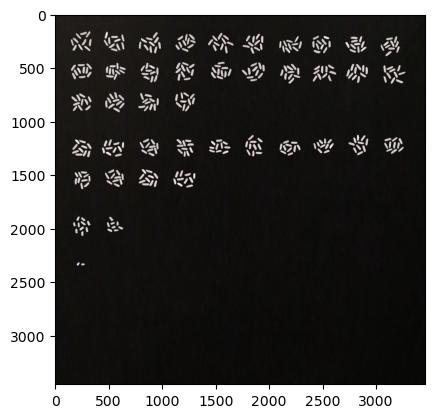

In [6]:
plt.imshow(Img_Sample1)

In [7]:
Img_Sample1_1 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample1\\Sample1_1.jpg")
Img_Sample1_2 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample1\\Sample1_2.jpg")
Img_Sample1_3 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample1\\Sample1_3.jpg")
Img_Sample1_4 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample1\\Sample1_4.jpg")

In [8]:
Img_Sample1_1_Gray=rgb2gray(Img_Sample1_1)
Img_Sample1_2_Gray=rgb2gray(Img_Sample1_2)
Img_Sample1_3_Gray=rgb2gray(Img_Sample1_3)
Img_Sample1_4_Gray=rgb2gray(Img_Sample1_4)

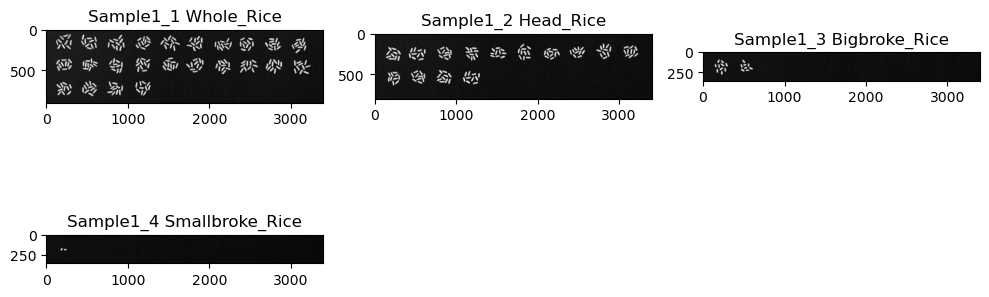

In [9]:
# Create a figure with subplots to display the images
plt.figure(figsize=(10, 4))


# Display the second image sample
plt.subplot(2, 3, 1)
plt.imshow(Img_Sample1_1_Gray, cmap='gray')
plt.title('Sample1_1 Whole_Rice')

# Display the third image sample
plt.subplot(2, 3, 2)
plt.imshow(Img_Sample1_2_Gray, cmap='gray')
plt.title('Sample1_2 Head_Rice')

# Display the fourth image sample
plt.subplot(2, 3, 3)
plt.imshow(Img_Sample1_3_Gray, cmap='gray')
plt.title('Sample1_3 Bigbroke_Rice')

# Display the fourth image sample
plt.subplot(2, 3, 4)
plt.imshow(Img_Sample1_4_Gray, cmap='gray')
plt.title('Sample1_4 Smallbroke_Rice')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
# Apply Otsu's thresholding to each image
threshold_Img_Sample1_1 = filters.threshold_otsu(Img_Sample1_1_Gray)
threshold_Img_Sample1_2 = filters.threshold_otsu(Img_Sample1_2_Gray)
threshold_Img_Sample1_3 = filters.threshold_otsu(Img_Sample1_3_Gray)
threshold_Img_Sample1_4 = filters.threshold_otsu(Img_Sample1_4_Gray)

In [11]:
# Sample1_1
img_mask_Sample1_1 = Img_Sample1_1_Gray > threshold_Img_Sample1_1
img_mask_Sample1_1 = morphology.remove_small_objects(img_mask_Sample1_1, 15)
img_mask_Sample1_1 = morphology.remove_small_holes(img_mask_Sample1_1, 15)

# Sample1_2
img_mask_Sample1_2 = Img_Sample1_2_Gray > threshold_Img_Sample1_2
img_mask_Sample1_2 = morphology.remove_small_objects(img_mask_Sample1_2, 15)
img_mask_Sample1_2 = morphology.remove_small_holes(img_mask_Sample1_2, 15)

# Sample1_3
img_mask_Sample1_3 = Img_Sample1_3_Gray > threshold_Img_Sample1_3
img_mask_Sample1_3 = morphology.remove_small_objects(img_mask_Sample1_3, 15)
img_mask_Sample1_3 = morphology.remove_small_holes(img_mask_Sample1_3, 15)

# Sample1_4
img_mask_Sample1_4 = Img_Sample1_4_Gray > threshold_Img_Sample1_4
img_mask_Sample1_4 = morphology.remove_small_objects(img_mask_Sample1_4, 15)
img_mask_Sample1_4 = morphology.remove_small_holes(img_mask_Sample1_4, 15)

In [12]:
img_labels_Sample1_1 = measure.label(img_mask_Sample1_1)
img_labels_Sample1_2 = measure.label(img_mask_Sample1_2)
img_labels_Sample1_3 = measure.label(img_mask_Sample1_3)
img_labels_Sample1_4 = measure.label(img_mask_Sample1_4)

Sample1_1

In [15]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample1_1 = regionprops_table(img_labels_Sample1_1, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample1_1)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Whole Rice') 

# Create a dictionary with all the properties
props_Sample1_1 = {
    'area': props_Sample1_1['area'],
    'major_axis_length': props_Sample1_1['major_axis_length'],
    'minor_axis_length': props_Sample1_1['minor_axis_length'],
    'perimeter': props_Sample1_1['perimeter'],
    'eccentricity': props_Sample1_1['eccentricity'],
    'solidity': props_Sample1_1['solidity'],
    'extent': props_Sample1_1['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample1_1 = pd.DataFrame(props_Sample1_1)

In [16]:
df_Sample1_1

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,1101.0,71.653909,19.921369,158.409163,0.960575,0.954073,0.433977,37.441110,3.596837,1.813691,0.273035,Whole Rice
1,1170.0,68.740281,21.902982,158.468037,0.947878,0.957447,0.600000,38.596506,3.138398,1.707999,0.315263,Whole Rice
2,1176.0,68.096447,22.625869,158.468037,0.943187,0.947623,0.602151,38.695345,3.009672,1.699285,0.322900,Whole Rice
3,1211.0,69.127190,22.634081,158.994949,0.944877,0.958828,0.472125,39.266947,3.054120,1.661165,0.322668,Whole Rice
4,1356.0,74.134883,23.791050,170.994949,0.947108,0.950245,0.481534,41.551328,3.116083,1.715920,0.314141,Whole Rice
...,...,...,...,...,...,...,...,...,...,...,...,...
235,1060.0,68.443411,20.158612,152.409163,0.955642,0.947274,0.440199,36.737364,3.395244,1.743839,0.288106,Whole Rice
236,1204.0,70.446099,22.423973,158.911688,0.947985,0.946541,0.729697,39.153294,3.141553,1.669073,0.308903,Whole Rice
237,953.0,61.146389,20.155013,138.752309,0.944114,0.961655,0.464878,34.833853,3.033805,1.607599,0.324535,Whole Rice
238,976.0,66.261010,18.980184,146.994949,0.958096,0.959685,0.436494,35.251692,3.491063,1.761754,0.283037,Whole Rice


Sample1_2

In [17]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample1_2 = regionprops_table(img_labels_Sample1_2, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample1_2)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Head Rice')  

# Create a dictionary with all the properties
props_Sample1_2 = {
    'area': props_Sample1_2['area'],
    'major_axis_length': props_Sample1_2['major_axis_length'],
    'minor_axis_length': props_Sample1_2['minor_axis_length'],
    'perimeter': props_Sample1_2['perimeter'],
    'eccentricity': props_Sample1_2['eccentricity'],
    'solidity': props_Sample1_2['solidity'],
    'extent': props_Sample1_2['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample1_2 = pd.DataFrame(props_Sample1_2)

In [18]:
df_Sample1_2

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,936.0,58.142131,20.788439,133.012193,0.933896,0.972973,0.835714,34.521764,2.796849,1.504171,0.352536,Head Rice
1,1138.0,69.101559,21.436271,152.894444,0.950667,0.958719,0.447327,38.065031,3.223581,1.634674,0.303443,Head Rice
2,1028.0,68.191315,19.560026,153.480231,0.957978,0.943119,0.426910,36.178588,3.486259,1.823484,0.281478,Head Rice
3,969.0,65.380499,19.268812,146.409163,0.955584,0.947214,0.425186,35.125050,3.393074,1.760366,0.288627,Head Rice
4,881.0,57.191350,19.915174,133.775649,0.937413,0.953463,0.584218,33.492149,2.871747,1.616473,0.342946,Head Rice
...,...,...,...,...,...,...,...,...,...,...,...,...
135,1035.0,58.536112,22.874793,138.852814,0.920484,0.961003,0.537942,36.301555,2.558979,1.482379,0.384594,Head Rice
136,1038.0,63.962143,21.139914,146.325902,0.943804,0.948812,0.676662,36.354128,3.025658,1.641479,0.323044,Head Rice
137,1063.0,63.015974,21.789443,146.124892,0.938317,0.957658,0.558298,36.789314,2.892042,1.598473,0.340833,Head Rice
138,1201.0,73.138918,21.379942,161.497475,0.956321,0.950158,0.828847,39.104484,3.420913,1.728139,0.285862,Head Rice


Sample1_3

In [19]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample1_3 = regionprops_table(img_labels_Sample1_3, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample1_3)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Big Broke')

# Create a dictionary with all the properties
props_Sample1_3 = {
    'area': props_Sample1_3['area'],
    'major_axis_length': props_Sample1_3['major_axis_length'],
    'minor_axis_length': props_Sample1_3['minor_axis_length'],
    'perimeter': props_Sample1_3['perimeter'],
    'eccentricity': props_Sample1_3['eccentricity'],
    'solidity': props_Sample1_3['solidity'],
    'extent': props_Sample1_3['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample1_3 = pd.DataFrame(props_Sample1_3)

In [20]:
df_Sample1_3

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,724.0,45.984950,20.622768,115.740115,0.893799,0.951380,0.583871,30.361578,2.229815,1.472378,0.435930,Big Broke
1,840.0,48.985597,22.496999,120.852814,0.888303,0.954545,0.525328,32.703535,2.177428,1.383644,0.445710,Big Broke
2,792.0,48.554685,21.275503,117.195959,0.898889,0.962333,0.536585,31.755405,2.282187,1.380035,0.427733,Big Broke
3,872.0,49.772152,23.145382,127.396970,0.885297,0.939655,0.587205,33.320637,2.150414,1.481125,0.448181,Big Broke
4,886.0,56.716183,20.352259,133.438600,0.933398,0.953714,0.485746,33.587055,2.786727,1.599261,0.350695,Big Broke
5,620.0,41.583309,19.707228,105.491378,0.880567,0.959752,0.776942,28.096415,2.110054,1.428343,0.456524,Big Broke
6,674.0,41.535979,21.648180,110.740115,0.853440,0.945302,0.587108,29.294427,1.918682,1.447905,0.497418,Big Broke
7,660.0,42.654483,20.431952,109.982756,0.877809,0.945559,0.582011,28.988586,2.087636,1.458463,0.461875,Big Broke
8,781.0,49.894300,20.344990,121.497475,0.913088,0.951279,0.628824,31.534110,2.452412,1.504089,0.399447,Big Broke
9,703.0,48.518636,18.866302,112.627417,0.921303,0.964335,0.867901,29.918011,2.571709,1.435896,0.380232,Big Broke


Sample1_4

In [21]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample1_4 = regionprops_table(img_labels_Sample1_4, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample1_4)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Small Broke')

# Create a dictionary with all the properties
props_Sample1_4 = {
    'area': props_Sample1_4['area'],
    'major_axis_length': props_Sample1_4['major_axis_length'],
    'minor_axis_length': props_Sample1_4['minor_axis_length'],
    'perimeter': props_Sample1_4['perimeter'],
    'eccentricity': props_Sample1_4['eccentricity'],
    'solidity': props_Sample1_4['solidity'],
    'extent': props_Sample1_4['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample1_4 = pd.DataFrame(props_Sample1_4)

In [22]:
df_Sample1_4

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,516.0,34.941465,19.055662,89.154329,0.838202,0.957328,0.616487,25.631847,1.833653,1.225816,0.538118,Small Broke
1,523.0,35.207074,19.279400,91.698485,0.836740,0.944043,0.769118,25.805121,1.826150,1.279419,0.537220,Small Broke


Combine

In [23]:
csv_file_path = 'Sample1_1.csv'
df_Sample1_1.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample1_2.csv'
df_Sample1_2.to_csv(csv_file_path, index=False) 
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample1_3.csv'
df_Sample1_3.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample1_4.csv'
df_Sample1_4.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

Data has been exported to Sample1_1.csv
Data has been exported to Sample1_2.csv
Data has been exported to Sample1_3.csv
Data has been exported to Sample1_4.csv


In [24]:
import pandas as pd

# List of CSV file names
csv_files = [
    "Sample1_1.csv",
    "Sample1_2.csv",
    "Sample1_3.csv",
    "Sample1_4.csv",
]

# Create an empty DataFrame to store the combined data
combined_prop_data = pd.DataFrame()

# Loop through the CSV files and append their data to the combined_data DataFrame
for file in csv_files:
    df = pd.read_csv(file)  # Read each CSV file
    combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame

# Save the combined data to a new CSV file
combined_prop_data.to_csv("Sample1_Data.csv", index=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\3599681874.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\3599681874.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\3599681874.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\35996818

In [25]:
Sample1_Data = pd.read_csv("Sample1_Data.csv")

In [26]:
Sample1_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               400 non-null    float64
 1   major_axis_length  400 non-null    float64
 2   minor_axis_length  400 non-null    float64
 3   perimeter          400 non-null    float64
 4   eccentricity       400 non-null    float64
 5   solidity           400 non-null    float64
 6   extent             400 non-null    float64
 7   equiv_diameter     400 non-null    float64
 8   aspect_ratio       400 non-null    float64
 9   compactness        400 non-null    float64
 10  roundness          400 non-null    float64
 11  category           400 non-null    object 
dtypes: float64(11), object(1)
memory usage: 37.6+ KB


In [27]:
Sample1_Data

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,1101.0,71.653909,19.921369,158.409163,0.960575,0.954073,0.433977,37.441110,3.596837,1.813691,0.273035,Whole Rice
1,1170.0,68.740281,21.902982,158.468037,0.947878,0.957447,0.600000,38.596506,3.138398,1.707999,0.315263,Whole Rice
2,1176.0,68.096447,22.625869,158.468037,0.943187,0.947623,0.602151,38.695345,3.009672,1.699285,0.322900,Whole Rice
3,1211.0,69.127190,22.634081,158.994949,0.944877,0.958828,0.472125,39.266947,3.054120,1.661165,0.322668,Whole Rice
4,1356.0,74.134883,23.791050,170.994949,0.947108,0.950245,0.481534,41.551328,3.116083,1.715920,0.314141,Whole Rice
...,...,...,...,...,...,...,...,...,...,...,...,...
395,857.0,50.098845,22.047997,122.468037,0.897954,0.956473,0.600982,33.032806,2.272263,1.392691,0.434746,Big Broke
396,651.0,46.059784,18.779369,111.455844,0.913108,0.943478,0.778708,28.790258,2.452680,1.518500,0.390704,Big Broke
397,746.0,44.829007,21.542209,109.455844,0.876972,0.980289,0.888095,30.819421,2.080985,1.277995,0.472640,Big Broke
398,516.0,34.941465,19.055662,89.154329,0.838202,0.957328,0.616487,25.631847,1.833653,1.225816,0.538118,Small Broke


In [49]:
unique_categories = Sample1_Data['category'].unique()
print(unique_categories)

['Whole Rice' 'Head Rice' 'Big Broke' 'Small Broke']


In [28]:
#####################     Sample1: CSV file is Sample1_Data.csv     ##################### 

# Sample 2 Rice Grade 5%

In [29]:
Img_Sample2 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample2\\Sample2.jpg")

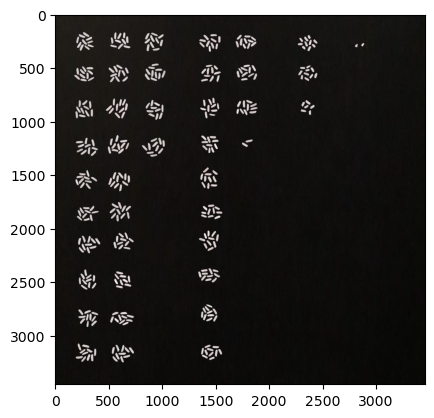

In [30]:
plt.imshow(Img_Sample2)

In [31]:
Img_Sample2_1 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample2\\Sample2_1.jpg")
Img_Sample2_2 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample2\\Sample2_2.jpg")
Img_Sample2_3 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample2\\Sample2_3.jpg")
Img_Sample2_4 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample2\\Sample2_4.jpg")

In [32]:
Img_Sample2_1_Gray=rgb2gray(Img_Sample2_1)
Img_Sample2_2_Gray=rgb2gray(Img_Sample2_2)
Img_Sample2_3_Gray=rgb2gray(Img_Sample2_3)
Img_Sample2_4_Gray=rgb2gray(Img_Sample2_4)

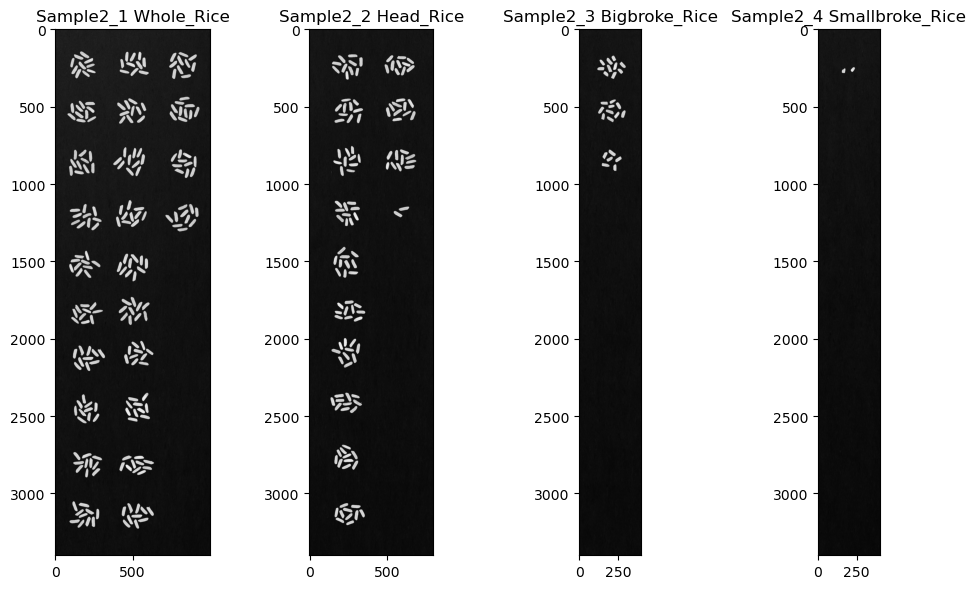

In [33]:
# Create a figure with subplots to display the images
plt.figure(figsize=(10, 6))


# Display the second image sample
plt.subplot(1, 4, 1)
plt.imshow(Img_Sample2_1_Gray, cmap='gray')
plt.title('Sample2_1 Whole_Rice')

# Display the third image sample
plt.subplot(1, 4, 2)
plt.imshow(Img_Sample2_2_Gray, cmap='gray')
plt.title('Sample2_2 Head_Rice')

# Display the fourth image sample
plt.subplot(1, 4, 3)
plt.imshow(Img_Sample2_3_Gray, cmap='gray')
plt.title('Sample2_3 Bigbroke_Rice')

# Display the fourth image sample
plt.subplot(1, 4, 4)
plt.imshow(Img_Sample2_4_Gray, cmap='gray')
plt.title('Sample2_4 Smallbroke_Rice')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
threshold_Img_Sample2_1 = filters.threshold_otsu(Img_Sample2_1_Gray)
threshold_Img_Sample2_2 = filters.threshold_otsu(Img_Sample2_2_Gray)
threshold_Img_Sample2_3 = filters.threshold_otsu(Img_Sample2_3_Gray)
threshold_Img_Sample2_4 = filters.threshold_otsu(Img_Sample2_4_Gray)

In [35]:
# Sample2_1
img_mask_Sample2_1 = Img_Sample2_1_Gray > threshold_Img_Sample2_1
img_mask_Sample2_1 = morphology.remove_small_objects(img_mask_Sample2_1, 15)
img_mask_Sample2_1 = morphology.remove_small_holes(img_mask_Sample2_1, 15)

# Sample2_2
img_mask_Sample2_2 = Img_Sample2_2_Gray > threshold_Img_Sample2_2
img_mask_Sample2_2 = morphology.remove_small_objects(img_mask_Sample2_2, 15)
img_mask_Sample2_2 = morphology.remove_small_holes(img_mask_Sample2_2, 15)

# Sample2_3
img_mask_Sample2_3 = Img_Sample2_3_Gray > threshold_Img_Sample2_3
img_mask_Sample2_3 = morphology.remove_small_objects(img_mask_Sample2_3, 15)
img_mask_Sample2_3 = morphology.remove_small_holes(img_mask_Sample2_3, 15)

# Sample2_4
img_mask_Sample2_4 = Img_Sample2_4_Gray > threshold_Img_Sample2_4
img_mask_Sample2_4 = morphology.remove_small_objects(img_mask_Sample2_4, 15)
img_mask_Sample2_4 = morphology.remove_small_holes(img_mask_Sample2_4, 15)

In [36]:
img_labels_Sample2_1 = measure.label(img_mask_Sample2_1)
img_labels_Sample2_2 = measure.label(img_mask_Sample2_2)
img_labels_Sample2_3 = measure.label(img_mask_Sample2_3)
img_labels_Sample2_4 = measure.label(img_mask_Sample2_4)

Sample2_1

In [37]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample2_1 = regionprops_table(img_labels_Sample2_1, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample2_1)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Whole Rice')  # Category 5 for Whole

# Create a dictionary with all the properties
props_Sample2_1 = {
    'area': props_Sample2_1['area'],
    'major_axis_length': props_Sample2_1['major_axis_length'],
    'minor_axis_length': props_Sample2_1['minor_axis_length'],
    'perimeter': props_Sample2_1['perimeter'],
    'eccentricity': props_Sample2_1['eccentricity'],
    'solidity': props_Sample2_1['solidity'],
    'extent': props_Sample2_1['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample2_1 = pd.DataFrame(props_Sample2_1)

In [38]:
df_Sample2_1

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,1260.0,71.496582,22.703544,162.409163,0.948242,0.964778,0.477273,40.053487,3.149138,1.665868,0.313841,Whole Rice
1,1104.0,67.751054,21.023568,150.669048,0.950637,0.970123,0.796537,37.492085,3.222624,1.636323,0.306230,Whole Rice
2,948.0,58.390897,20.900842,133.254834,0.933742,0.961460,0.769481,34.742353,2.793710,1.490554,0.354020,Whole Rice
3,1047.0,70.367938,19.187485,159.195959,0.962107,0.948370,0.481158,36.511393,3.667387,1.926227,0.269220,Whole Rice
4,1148.0,66.868341,22.100976,152.610173,0.943801,0.963087,0.530009,38.231911,3.025583,1.614415,0.326897,Whole Rice
...,...,...,...,...,...,...,...,...,...,...,...,...
235,1190.0,72.033093,21.434382,163.639610,0.954702,0.955823,0.603448,38.924993,3.360633,1.790689,0.292007,Whole Rice
236,1086.0,66.122660,21.314786,152.124892,0.946620,0.959364,0.548485,37.185187,3.102197,1.695746,0.316256,Whole Rice
237,1193.0,70.393179,22.265468,158.083261,0.948659,0.941594,0.723030,38.974027,3.161540,1.666946,0.306542,Whole Rice
238,974.0,66.297948,18.919205,145.580736,0.958419,0.962451,0.435599,35.215555,3.504267,1.731566,0.282143,Whole Rice


Sample2_2

In [39]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample2_2 = regionprops_table(img_labels_Sample2_2, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample2_2)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Head rice')  # Category 4 for Head

# Create a dictionary with all the properties
props_Sample2_2 = {
    'area': props_Sample2_2['area'],
    'major_axis_length': props_Sample2_2['major_axis_length'],
    'minor_axis_length': props_Sample2_2['minor_axis_length'],
    'perimeter': props_Sample2_2['perimeter'],
    'eccentricity': props_Sample2_2['eccentricity'],
    'solidity': props_Sample2_2['solidity'],
    'extent': props_Sample2_2['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample2_2 = pd.DataFrame(props_Sample2_2)

In [40]:
df_Sample2_2

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,1003.0,64.672023,20.042389,141.941125,0.950766,0.970958,0.865401,35.735966,3.226762,1.598474,0.305336,Head rice
1,1150.0,66.668501,22.284304,151.580736,0.942483,0.963956,0.479167,38.265199,2.991725,1.589938,0.329433,Head rice
2,1005.0,60.713672,21.256516,137.580736,0.936708,0.968208,0.485507,35.771577,2.856238,1.498785,0.347139,Head rice
3,970.0,62.187800,20.259230,140.183766,0.945447,0.945419,0.782889,35.143169,3.069603,1.612181,0.319353,Head rice
4,1140.0,64.921915,22.838141,145.941125,0.936083,0.975192,0.904762,38.098466,2.842697,1.486759,0.344376,Head rice
...,...,...,...,...,...,...,...,...,...,...,...,...
127,989.0,57.693192,22.390693,139.539105,0.921618,0.948226,0.548835,35.485686,2.576660,1.566700,0.378318,Head rice
128,1184.0,69.269758,22.159280,156.911688,0.947452,0.954839,0.717576,38.826738,3.125993,1.654813,0.314177,Head rice
129,972.0,62.763678,19.880613,139.338095,0.948508,0.972000,0.470019,35.179381,3.157029,1.589511,0.314166,Head rice
130,955.0,62.918164,19.879925,143.195959,0.948771,0.931707,0.496104,34.870385,3.164910,1.708631,0.307158,Head rice


Sample2_3

In [41]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample2_3 = regionprops_table(img_labels_Sample2_3, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample2_3)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Big Broke')  # Category 3 for Big Broke

# Create a dictionary with all the properties
props_Sample2_3 = {
    'area': props_Sample2_3['area'],
    'major_axis_length': props_Sample2_3['major_axis_length'],
    'minor_axis_length': props_Sample2_3['minor_axis_length'],
    'perimeter': props_Sample2_3['perimeter'],
    'eccentricity': props_Sample2_3['eccentricity'],
    'solidity': props_Sample2_3['solidity'],
    'extent': props_Sample2_3['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample2_3 = pd.DataFrame(props_Sample2_3)

In [42]:
df_Sample2_3

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,664.0,37.938992,22.667306,102.225397,0.801893,0.958153,0.614815,29.076297,1.673732,1.252390,0.587363,Big Broke
1,951.0,55.232275,22.493587,129.923882,0.913315,0.956740,0.515447,34.797282,2.455468,1.412497,0.396922,Big Broke
2,713.0,47.588991,19.343941,112.953319,0.913660,0.959623,0.521199,30.130048,2.460150,1.423963,0.400854,Big Broke
3,842.0,48.794048,22.426294,119.095454,0.888120,0.972286,0.526250,32.742445,2.175752,1.340505,0.450286,Big Broke
4,866.0,53.755282,20.826861,127.497475,0.921896,0.960089,0.644345,33.205804,2.581055,1.493741,0.381580,Big Broke
5,931.0,55.971264,22.021700,137.811183,0.919348,0.940404,0.554167,34.429435,2.541641,1.623340,0.378381,Big Broke
6,834.0,47.523084,22.660397,115.698485,0.878996,0.981176,0.882540,32.586528,2.097187,1.277260,0.470183,Big Broke
7,699.0,41.470605,21.851751,105.882251,0.849914,0.961486,0.587395,29.832775,1.897816,1.276319,0.517495,Big Broke
8,672.0,39.957736,21.811188,102.811183,0.837879,0.965517,0.617647,29.250931,1.831984,1.251704,0.535892,Big Broke
9,941.0,52.793912,23.331763,132.468037,0.897044,0.954361,0.568237,34.613847,2.262749,1.483962,0.429865,Big Broke


Sample2_4

In [43]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample2_4 = regionprops_table(img_labels_Sample2_4, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample2_4)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Small Broke')  # Category 2 for Small

# Create a dictionary with all the properties
props_Sample2_4 = {
    'area': props_Sample1_4['area'],
    'major_axis_length': props_Sample2_4['major_axis_length'],
    'minor_axis_length': props_Sample2_4['minor_axis_length'],
    'perimeter': props_Sample2_4['perimeter'],
    'eccentricity': props_Sample2_4['eccentricity'],
    'solidity': props_Sample2_4['solidity'],
    'extent': props_Sample2_4['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample2_4 = pd.DataFrame(props_Sample2_4)

In [44]:
df_Sample2_4

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,516.0,34.710176,19.091537,89.154329,0.835147,0.957090,0.612903,25.557228,1.818092,1.232985,0.542143,Small Broke
1,523.0,32.274153,21.518863,90.526912,0.745279,0.947559,0.734923,25.829780,1.499808,1.244555,0.640519,Small Broke


Combine

In [50]:
csv_file_path = 'Sample2_1.csv'
df_Sample2_1.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample2_2.csv'
df_Sample2_2.to_csv(csv_file_path, index=False) 
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample2_3.csv'
df_Sample2_3.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample2_4.csv'
df_Sample2_4.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

Data has been exported to Sample2_1.csv
Data has been exported to Sample2_2.csv
Data has been exported to Sample2_3.csv
Data has been exported to Sample2_4.csv


In [51]:
import pandas as pd

# List of CSV file names
csv_files = [
    "Sample2_1.csv",
    "Sample2_2.csv",
    "Sample2_3.csv",
    "Sample2_4.csv",
]

# Create an empty DataFrame to store the combined data
combined_prop_data = pd.DataFrame()

# Loop through the CSV files and append their data to the combined_data DataFrame
for file in csv_files:
    df = pd.read_csv(file)  # Read each CSV file
    combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame

# Save the combined data to a new CSV file
combined_prop_data.to_csv("Sample2_Data.csv", index=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\1012631406.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\1012631406.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\1012631406.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\10126314

In [52]:
Sample2_Data = pd.read_csv("Sample2_Data.csv")

In [53]:
Sample2_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               400 non-null    float64
 1   major_axis_length  400 non-null    float64
 2   minor_axis_length  400 non-null    float64
 3   perimeter          400 non-null    float64
 4   eccentricity       400 non-null    float64
 5   solidity           400 non-null    float64
 6   extent             400 non-null    float64
 7   equiv_diameter     400 non-null    float64
 8   aspect_ratio       400 non-null    float64
 9   compactness        400 non-null    float64
 10  roundness          400 non-null    float64
 11  category           400 non-null    object 
dtypes: float64(11), object(1)
memory usage: 37.6+ KB


In [54]:
Sample2_Data

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,1260.0,71.496582,22.703544,162.409163,0.948242,0.964778,0.477273,40.053487,3.149138,1.665868,0.313841,Whole Rice
1,1104.0,67.751054,21.023568,150.669048,0.950637,0.970123,0.796537,37.492085,3.222624,1.636323,0.306230,Whole Rice
2,948.0,58.390897,20.900842,133.254834,0.933742,0.961460,0.769481,34.742353,2.793710,1.490554,0.354020,Whole Rice
3,1047.0,70.367938,19.187485,159.195959,0.962107,0.948370,0.481158,36.511393,3.667387,1.926227,0.269220,Whole Rice
4,1148.0,66.868341,22.100976,152.610173,0.943801,0.963087,0.530009,38.231911,3.025583,1.614415,0.326897,Whole Rice
...,...,...,...,...,...,...,...,...,...,...,...,...
395,759.0,46.327132,21.293222,114.225397,0.888112,0.955919,0.592969,31.086795,2.175675,1.367961,0.450278,Big Broke
396,876.0,53.997930,21.051092,127.840620,0.920878,0.955289,0.700800,33.396974,2.565089,1.484649,0.382525,Big Broke
397,741.0,44.686053,21.459363,108.870058,0.877145,0.980159,0.882143,30.715965,2.082357,1.272884,0.472481,Big Broke
398,516.0,34.710176,19.091537,89.154329,0.835147,0.957090,0.612903,25.557228,1.818092,1.232985,0.542143,Small Broke


In [55]:
unique_categories = Sample2_Data['category'].unique()
print(unique_categories)

['Whole Rice' 'Head rice' 'Big Broke' 'Small Broke']


In [47]:
#####################     Sample2: CSV file is Sample2_Data.csv     ##################### 

# Sample 3 Rice Grade 10%

In [56]:
Img_Sample3 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample3\\Sample3.jpg")

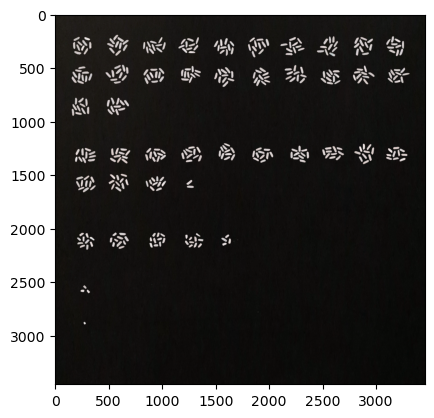

In [57]:
plt.imshow(Img_Sample3)

In [58]:
Img_Sample3_1 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample3\\Sample3_1.jpg")
Img_Sample3_2 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample3\\Sample3_2.jpg")
Img_Sample3_3 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample3\\Sample3_3.jpg")
Img_Sample3_4 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample3\\Sample3_4.jpg")
Img_Sample3_5 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample3\\Sample3_5.jpg")

In [59]:
Img_Sample3_1_Gray=rgb2gray(Img_Sample3_1)
Img_Sample3_2_Gray=rgb2gray(Img_Sample3_2)
Img_Sample3_3_Gray=rgb2gray(Img_Sample3_3)
Img_Sample3_4_Gray=rgb2gray(Img_Sample3_4)
Img_Sample3_5_Gray=rgb2gray(Img_Sample3_5)

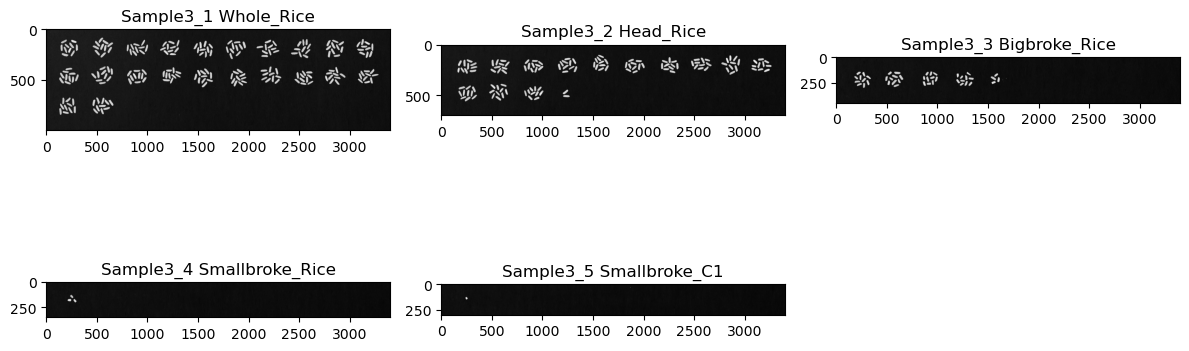

In [60]:
# Create a figure with subplots to display the images
plt.figure(figsize=(12, 5))


# Display the second image sample
plt.subplot(2, 3, 1)
plt.imshow(Img_Sample3_1_Gray, cmap='gray')
plt.title('Sample3_1 Whole_Rice')

# Display the third image sample
plt.subplot(2, 3, 2)
plt.imshow(Img_Sample3_2_Gray, cmap='gray')
plt.title('Sample3_2 Head_Rice')

# Display the fourth image sample
plt.subplot(2, 3, 3)
plt.imshow(Img_Sample3_3_Gray, cmap='gray')
plt.title('Sample3_3 Bigbroke_Rice')

# Display the fourth image sample
plt.subplot(2, 3, 4)
plt.imshow(Img_Sample3_4_Gray, cmap='gray')
plt.title('Sample3_4 Smallbroke_Rice')

# Display the fifth  image sample
plt.subplot(2, 3, 5)
plt.imshow(Img_Sample3_5_Gray, cmap='gray')
plt.title('Sample3_5 Smallbroke_C1')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [61]:
threshold_Img_Sample3_1 = filters.threshold_otsu(Img_Sample3_1_Gray)
threshold_Img_Sample3_2 = filters.threshold_otsu(Img_Sample3_2_Gray)
threshold_Img_Sample3_3 = filters.threshold_otsu(Img_Sample3_3_Gray)
threshold_Img_Sample3_4 = filters.threshold_otsu(Img_Sample3_4_Gray)
threshold_Img_Sample3_5 = filters.threshold_otsu(Img_Sample3_5_Gray)

In [62]:
# Sample3_1 
img_mask_Sample3_1 = Img_Sample3_1_Gray > threshold_Img_Sample3_1
img_mask_Sample3_1 = morphology.remove_small_objects(img_mask_Sample3_1, 15)
img_mask_Sample3_1 = morphology.remove_small_holes(img_mask_Sample3_1, 15)

# Sample3_2
img_mask_Sample3_2 = Img_Sample3_2_Gray > threshold_Img_Sample3_2
img_mask_Sample3_2 = morphology.remove_small_objects(img_mask_Sample3_2, 15)
img_mask_Sample3_2 = morphology.remove_small_holes(img_mask_Sample3_2, 15)

# Sample3_3
img_mask_Sample3_3 = Img_Sample3_3_Gray > threshold_Img_Sample3_3
img_mask_Sample3_3 = morphology.remove_small_objects(img_mask_Sample3_3, 15)
img_mask_Sample3_3 = morphology.remove_small_holes(img_mask_Sample3_3, 15)

# Sample3_4
img_mask_Sample3_4 = Img_Sample3_4_Gray > threshold_Img_Sample3_4
img_mask_Sample3_4 = morphology.remove_small_objects(img_mask_Sample3_4, 15)
img_mask_Sample3_4 = morphology.remove_small_holes(img_mask_Sample3_4, 15)

# Sample3_5
img_mask_Sample3_5 = Img_Sample3_5_Gray > threshold_Img_Sample3_5
img_mask_Sample3_5 = morphology.remove_small_objects(img_mask_Sample3_5, 15)
img_mask_Sample3_5 = morphology.remove_small_holes(img_mask_Sample3_5, 15)

In [63]:
img_labels_Sample3_1 = measure.label(img_mask_Sample3_1)
img_labels_Sample3_2 = measure.label(img_mask_Sample3_2)
img_labels_Sample3_3 = measure.label(img_mask_Sample3_3)
img_labels_Sample3_4 = measure.label(img_mask_Sample3_4)
img_labels_Sample3_5 = measure.label(img_mask_Sample3_5)

Sample3_1

In [64]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample3_1 = regionprops_table(img_labels_Sample3_1, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample3_1)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Whole Rice')  # Category 5 for Whole

# Create a dictionary with all the properties
props_Sample3_1 = {
    'area': props_Sample3_1['area'],
    'major_axis_length': props_Sample3_1['major_axis_length'],
    'minor_axis_length': props_Sample3_1['minor_axis_length'],
    'perimeter': props_Sample3_1['perimeter'],
    'eccentricity': props_Sample3_1['eccentricity'],
    'solidity': props_Sample3_1['solidity'],
    'extent': props_Sample3_1['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample3_1 = pd.DataFrame(props_Sample3_1)

In [65]:
df_Sample3_1

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,1117.0,65.854698,22.142203,151.823376,0.941781,0.955518,0.458162,37.712181,2.974171,1.642155,0.327937,Whole Rice
1,1038.0,62.841487,21.275411,143.012193,0.940946,0.960222,0.810304,36.354128,2.953714,1.567974,0.334668,Whole Rice
2,1128.0,64.224762,22.707464,149.740115,0.935411,0.947899,0.696296,37.897417,2.828355,1.581821,0.348188,Whole Rice
3,1019.0,65.666510,19.924394,151.497475,0.952858,0.947907,0.746520,36.019871,3.295785,1.792366,0.300882,Whole Rice
4,1056.0,66.481353,20.553220,151.195959,0.951011,0.942857,0.500711,36.667983,3.234596,1.722688,0.304211,Whole Rice
...,...,...,...,...,...,...,...,...,...,...,...,...
215,1195.0,72.076350,21.489217,163.639610,0.954521,0.956000,0.605984,39.006682,3.354071,1.783196,0.292882,Whole Rice
216,1094.0,66.449099,21.402370,152.953319,0.946710,0.957968,0.536275,37.321898,3.104754,1.701730,0.315464,Whole Rice
217,1174.0,68.665825,22.011427,155.497475,0.947229,0.958367,0.752564,38.662427,3.119553,1.638961,0.317027,Whole Rice
218,1103.0,68.698729,20.891757,151.722871,0.952638,0.967544,0.432889,37.475101,3.288317,1.660798,0.297569,Whole Rice


Sample3_2

In [66]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample3_2 = regionprops_table(img_labels_Sample3_2, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample3_2)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Head rice')  # Category 4 for Head

# Create a dictionary with all the properties
props_Sample3_2 = {
    'area': props_Sample3_2['area'],
    'major_axis_length': props_Sample3_2['major_axis_length'],
    'minor_axis_length': props_Sample3_2['minor_axis_length'],
    'perimeter': props_Sample3_2['perimeter'],
    'eccentricity': props_Sample3_2['eccentricity'],
    'solidity': props_Sample3_2['solidity'],
    'extent': props_Sample3_2['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample3_2 = pd.DataFrame(props_Sample3_2)

In [67]:
df_Sample3_2

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,880.0,64.736634,17.488300,145.296465,0.962820,0.942184,0.489433,33.473135,3.701711,1.909051,0.267358,Head rice
1,936.0,58.142131,20.788439,133.012193,0.933896,0.972973,0.835714,34.521764,2.796849,1.504171,0.352536,Head rice
2,1028.0,68.292229,19.528652,153.237590,0.958242,0.943119,0.426910,36.178588,3.497027,1.817723,0.280647,Head rice
3,926.0,60.729098,19.899182,134.994949,0.944792,0.970650,0.457510,34.336858,3.051839,1.566081,0.319689,Head rice
4,1057.0,60.546495,22.585737,140.183766,0.927819,0.974194,0.883041,36.685340,2.680740,1.479485,0.367119,Head rice
...,...,...,...,...,...,...,...,...,...,...,...,...
127,980.0,59.665131,21.259387,136.509668,0.934367,0.962672,0.494949,35.323855,2.806531,1.513181,0.350506,Head rice
128,1180.0,68.353038,22.376132,154.651804,0.944899,0.967213,0.470494,38.761097,3.054730,1.612940,0.321571,Head rice
129,890.0,64.340515,17.851747,144.710678,0.960738,0.947817,0.494994,33.662786,3.604158,1.872411,0.273735,Head rice
130,1243.0,69.562514,22.973013,158.409163,0.943894,0.968823,0.482531,39.782367,3.028010,1.606496,0.327062,Head rice


Sample3_3

In [68]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample3_3 = regionprops_table(img_labels_Sample3_3, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample3_3)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Big Broke')  # Category 3 for Big Broke

# Create a dictionary with all the properties
props_Sample3_3 = {
    'area': props_Sample3_3['area'],
    'major_axis_length': props_Sample3_3['major_axis_length'],
    'minor_axis_length': props_Sample3_3['minor_axis_length'],
    'perimeter': props_Sample3_3['perimeter'],
    'eccentricity': props_Sample3_3['eccentricity'],
    'solidity': props_Sample3_3['solidity'],
    'extent': props_Sample3_3['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample3_3 = pd.DataFrame(props_Sample3_3)

In [69]:
df_Sample3_3 

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,751.0,44.494238,22.021156,111.781746,0.868938,0.959132,0.552206,30.922531,2.020522,1.324012,0.482995,Big Broke
1,734.0,45.636389,20.874502,113.254834,0.889256,0.954486,0.672161,30.570539,2.186226,1.390617,0.448728,Big Broke
2,781.0,47.123331,21.525840,116.710678,0.889570,0.953602,0.581101,31.534110,2.189152,1.387907,0.447805,Big Broke
3,1152.0,64.668588,23.029445,151.497475,0.934442,0.960000,0.807854,38.298459,2.808083,1.585435,0.350732,Big Broke
4,716.0,42.157815,21.956537,107.053824,0.853668,0.966262,0.604730,30.193369,1.920058,1.273742,0.512940,Big Broke
5,593.0,50.286482,15.991070,116.746212,0.948091,0.922240,0.415266,27.477828,3.144660,1.829031,0.298581,Big Broke
6,802.0,48.430339,21.698921,120.811183,0.894012,0.954762,0.594074,31.955252,2.231924,1.448205,0.435361,Big Broke
7,704.0,51.792389,17.577247,120.367532,0.940650,0.951351,0.470588,29.939283,2.946559,1.637707,0.334157,Big Broke
8,732.0,45.156692,20.864599,111.053824,0.886854,0.959371,0.581876,30.528861,2.164273,1.340745,0.457064,Big Broke
9,651.0,39.976668,21.281535,101.355339,0.846525,0.970194,0.794872,28.790258,1.878467,1.255748,0.518654,Big Broke


Sample3_4

In [70]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample3_4 = regionprops_table(img_labels_Sample3_4, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample3_4)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Small Broke')  # Category 2 for Small

# Create a dictionary with all the properties
props_Sample3_4 = {
    'area': props_Sample3_4['area'],
    'major_axis_length': props_Sample3_4['major_axis_length'],
    'minor_axis_length': props_Sample3_4['minor_axis_length'],
    'perimeter': props_Sample3_4['perimeter'],
    'eccentricity': props_Sample3_4['eccentricity'],
    'solidity': props_Sample3_4['solidity'],
    'extent': props_Sample3_4['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample3_4 = pd.DataFrame(props_Sample3_4)

In [71]:
df_Sample3_4 

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,594.0,37.251499,20.691983,96.124892,0.831539,0.965854,0.562500,27.500987,1.800287,1.237871,0.545016,Small Broke
1,669.0,37.057968,23.222278,99.597980,0.779303,0.963977,0.786134,29.185566,1.595794,1.179954,0.620259,Small Broke
2,588.0,36.867721,20.796947,95.296465,0.825709,0.971901,0.576471,27.361741,1.772747,1.229041,0.550801,Small Broke


Sample3_5

In [72]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample3_5 = regionprops_table(img_labels_Sample3_5, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample3_5)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Small Broke C1')  # Category 1 for C1

# Create a dictionary with all the properties
props_Sample3_5 = {
    'area': props_Sample3_5['area'],
    'major_axis_length': props_Sample3_5['major_axis_length'],
    'minor_axis_length': props_Sample3_5['minor_axis_length'],
    'perimeter': props_Sample3_5['perimeter'],
    'eccentricity': props_Sample3_5['eccentricity'],
    'solidity': props_Sample3_5['solidity'],
    'extent': props_Sample3_5['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample3_5 = pd.DataFrame(props_Sample3_5)

In [73]:
df_Sample3_5

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,368.0,24.957233,18.894142,70.183766,0.653345,0.968421,0.730159,21.646066,1.320898,1.065162,0.752255,Small Broke C1


Combine

In [74]:
csv_file_path = 'Sample3_1.csv'
df_Sample3_1.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample3_2.csv'
df_Sample3_2.to_csv(csv_file_path, index=False) 
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample3_3.csv'
df_Sample3_3.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample3_4.csv'
df_Sample3_4.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample3_5.csv'
df_Sample3_5.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

Data has been exported to Sample3_1.csv
Data has been exported to Sample3_2.csv
Data has been exported to Sample3_3.csv
Data has been exported to Sample3_4.csv
Data has been exported to Sample3_5.csv


In [75]:
import pandas as pd

# List of CSV file names
csv_files = [
    "Sample3_1.csv",
    "Sample3_2.csv",
    "Sample3_3.csv",
    "Sample3_4.csv",
    "Sample3_5.csv",
]

# Create an empty DataFrame to store the combined data
combined_prop_data = pd.DataFrame()

# Loop through the CSV files and append their data to the combined_data DataFrame
for file in csv_files:
    df = pd.read_csv(file)  # Read each CSV file
    combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame

# Save the combined data to a new CSV file
combined_prop_data.to_csv("Sample3_Data.csv", index=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\2920714122.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\2920714122.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\2920714122.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\29207141

In [76]:
Sample3_Data = pd.read_csv("Sample3_Data.csv")

In [77]:
Sample3_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               400 non-null    float64
 1   major_axis_length  400 non-null    float64
 2   minor_axis_length  400 non-null    float64
 3   perimeter          400 non-null    float64
 4   eccentricity       400 non-null    float64
 5   solidity           400 non-null    float64
 6   extent             400 non-null    float64
 7   equiv_diameter     400 non-null    float64
 8   aspect_ratio       400 non-null    float64
 9   compactness        400 non-null    float64
 10  roundness          400 non-null    float64
 11  category           400 non-null    object 
dtypes: float64(11), object(1)
memory usage: 37.6+ KB


In [78]:
Sample3_Data

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,1117.0,65.854698,22.142203,151.823376,0.941781,0.955518,0.458162,37.712181,2.974171,1.642155,0.327937,Whole Rice
1,1038.0,62.841487,21.275411,143.012193,0.940946,0.960222,0.810304,36.354128,2.953714,1.567974,0.334668,Whole Rice
2,1128.0,64.224762,22.707464,149.740115,0.935411,0.947899,0.696296,37.897417,2.828355,1.581821,0.348188,Whole Rice
3,1019.0,65.666510,19.924394,151.497475,0.952858,0.947907,0.746520,36.019871,3.295785,1.792366,0.300882,Whole Rice
4,1056.0,66.481353,20.553220,151.195959,0.951011,0.942857,0.500711,36.667983,3.234596,1.722688,0.304211,Whole Rice
...,...,...,...,...,...,...,...,...,...,...,...,...
395,877.0,59.288204,18.985364,135.982756,0.947343,0.954298,0.590572,33.416030,3.122837,1.677870,0.317668,Big Broke
396,594.0,37.251499,20.691983,96.124892,0.831539,0.965854,0.562500,27.500987,1.800287,1.237871,0.545016,Small Broke
397,669.0,37.057968,23.222278,99.597980,0.779303,0.963977,0.786134,29.185566,1.595794,1.179954,0.620259,Small Broke
398,588.0,36.867721,20.796947,95.296465,0.825709,0.971901,0.576471,27.361741,1.772747,1.229041,0.550801,Small Broke


In [79]:
unique_categories = Sample3_Data['category'].unique()
print(unique_categories)

['Whole Rice' 'Head rice' 'Big Broke' 'Small Broke' 'Small Broke C1']


In [80]:
#####################     Sample3: CSV file is Sample3_Data.csv     ##################### 

# Sample 4 Rice Grade 15%

In [81]:
Img_Sample4 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample4\\Sample4.jpg")

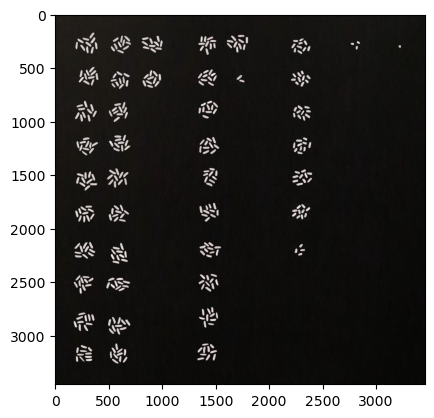

In [82]:
plt.imshow(Img_Sample4)

In [83]:
Img_Sample4_1 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample4\\Sample4_1.jpg")
Img_Sample4_2 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample4\\Sample4_2.jpg")
Img_Sample4_3 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample4\\Sample4_3.jpg")
Img_Sample4_4 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample4\\Sample4_4.jpg")
Img_Sample4_5 = cv2.imread("D:\\Test_Al\\Images_Datasets\\02_Testing_images\\Sample4\\Sample4_5.jpg")

In [84]:
Img_Sample4_1_Gray=rgb2gray(Img_Sample4_1)
Img_Sample4_2_Gray=rgb2gray(Img_Sample4_2)
Img_Sample4_3_Gray=rgb2gray(Img_Sample4_3)
Img_Sample4_4_Gray=rgb2gray(Img_Sample4_4)
Img_Sample4_5_Gray=rgb2gray(Img_Sample4_5)

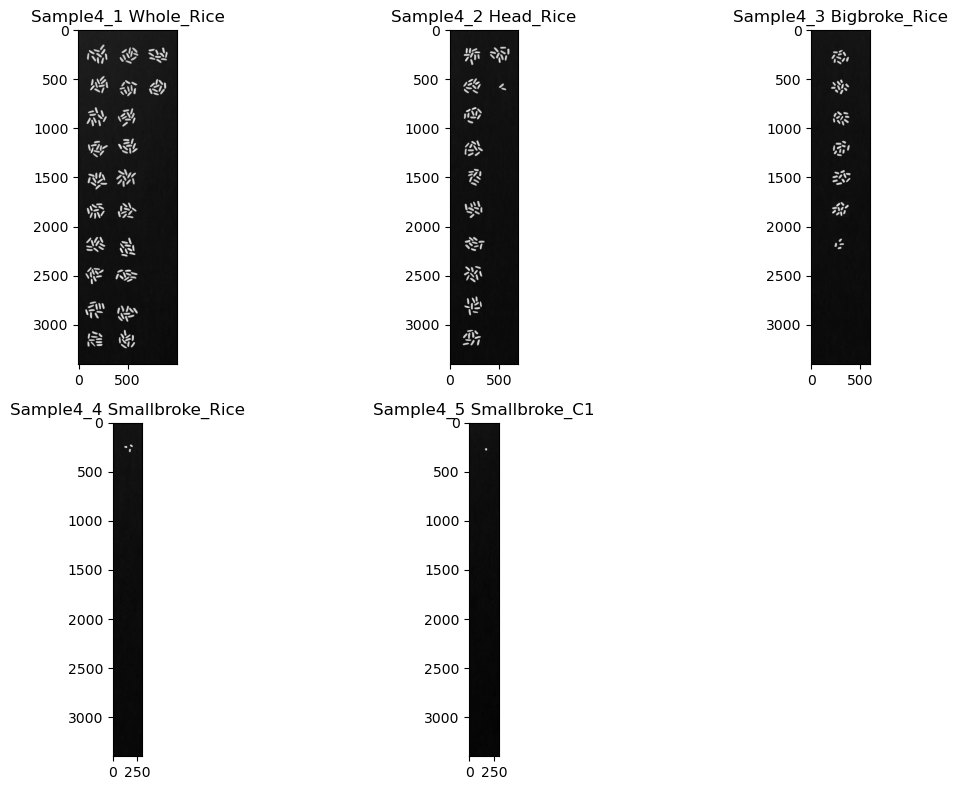

In [85]:
# Create a figure with subplots to display the images
plt.figure(figsize=(12, 8))


# Display the second image sample
plt.subplot(2, 3, 1)
plt.imshow(Img_Sample4_1_Gray, cmap='gray')
plt.title('Sample4_1 Whole_Rice')

# Display the third image sample
plt.subplot(2, 3, 2)
plt.imshow(Img_Sample4_2_Gray, cmap='gray')
plt.title('Sample4_2 Head_Rice')

# Display the fourth image sample
plt.subplot(2, 3, 3)
plt.imshow(Img_Sample4_3_Gray, cmap='gray')
plt.title('Sample4_3 Bigbroke_Rice')

# Display the fourth image sample
plt.subplot(2, 3, 4)
plt.imshow(Img_Sample4_4_Gray, cmap='gray')
plt.title('Sample4_4 Smallbroke_Rice')

# Display the fifth  image sample
plt.subplot(2, 3, 5)
plt.imshow(Img_Sample4_5_Gray, cmap='gray')
plt.title('Sample4_5 Smallbroke_C1')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [86]:
threshold_Img_Sample4_1 = filters.threshold_otsu(Img_Sample4_1_Gray)
threshold_Img_Sample4_2 = filters.threshold_otsu(Img_Sample4_2_Gray)
threshold_Img_Sample4_3 = filters.threshold_otsu(Img_Sample4_3_Gray)
threshold_Img_Sample4_4 = filters.threshold_otsu(Img_Sample4_4_Gray)
threshold_Img_Sample4_5 = filters.threshold_otsu(Img_Sample4_5_Gray)

In [87]:
# Sample4_1
img_mask_Sample4_1 = Img_Sample4_1_Gray > threshold_Img_Sample4_1
img_mask_Sample4_1 = morphology.remove_small_objects(img_mask_Sample4_1, 15)
img_mask_Sample4_1 = morphology.remove_small_holes(img_mask_Sample4_1, 15)

# Sample4_2
img_mask_Sample4_2 = Img_Sample4_2_Gray > threshold_Img_Sample4_2
img_mask_Sample4_2 = morphology.remove_small_objects(img_mask_Sample4_2, 15)
img_mask_Sample4_2 = morphology.remove_small_holes(img_mask_Sample4_2, 15)

# Sample4_3
img_mask_Sample4_3 = Img_Sample4_3_Gray > threshold_Img_Sample4_3
img_mask_Sample4_3 = morphology.remove_small_objects(img_mask_Sample4_3, 15)
img_mask_Sample4_3 = morphology.remove_small_holes(img_mask_Sample4_3, 15)

# Sample4_4
img_mask_Sample4_4 = Img_Sample4_4_Gray > threshold_Img_Sample4_4
img_mask_Sample4_4 = morphology.remove_small_objects(img_mask_Sample4_4, 15)
img_mask_Sample4_4 = morphology.remove_small_holes(img_mask_Sample4_4, 15)

# Sample4_5
img_mask_Sample4_5 = Img_Sample4_5_Gray > threshold_Img_Sample4_5
img_mask_Sample4_5 = morphology.remove_small_objects(img_mask_Sample4_5, 15)
img_mask_Sample4_5 = morphology.remove_small_holes(img_mask_Sample4_5, 15)

In [88]:
img_labels_Sample4_1 = measure.label(img_mask_Sample4_1)
img_labels_Sample4_2 = measure.label(img_mask_Sample4_2)
img_labels_Sample4_3 = measure.label(img_mask_Sample4_3)
img_labels_Sample4_4 = measure.label(img_mask_Sample4_4)
img_labels_Sample4_5 = measure.label(img_mask_Sample4_5)

Sample4_1

In [89]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample4_1 = regionprops_table(img_labels_Sample4_1, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample4_1)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Whole Rice')  # Category 5 for Whole

# Create a dictionary with all the properties
props_Sample4_1 = {
    'area': props_Sample4_1['area'],
    'major_axis_length': props_Sample4_1['major_axis_length'],
    'minor_axis_length': props_Sample4_1['minor_axis_length'],
    'perimeter': props_Sample4_1['perimeter'],
    'eccentricity': props_Sample4_1['eccentricity'],
    'solidity': props_Sample4_1['solidity'],
    'extent': props_Sample4_1['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample4_1 = pd.DataFrame(props_Sample4_1)

In [90]:
df_Sample4_1

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,1207.0,69.227836,22.512157,158.651804,0.945649,0.960987,0.470565,39.202042,3.075131,1.659483,0.320668,Whole Rice
1,1023.0,71.645640,18.339173,156.325902,0.966685,0.955182,0.654092,36.090498,3.906700,1.900975,0.253750,Whole Rice
2,1115.0,62.839069,22.934397,147.740115,0.931019,0.956261,0.662901,37.678404,2.739949,1.557802,0.359522,Whole Rice
3,1254.0,73.055586,22.097360,165.722871,0.953158,0.960184,0.430189,39.958008,3.306078,1.742840,0.299158,Whole Rice
4,1078.0,65.568443,21.290971,149.923882,0.945812,0.963360,0.473014,37.047972,3.079636,1.659255,0.319256,Whole Rice
...,...,...,...,...,...,...,...,...,...,...,...,...
215,966.0,59.291285,21.315682,137.254834,0.933142,0.957384,0.736842,35.070634,2.781580,1.551916,0.349869,Whole Rice
216,771.0,67.172362,14.958021,145.651804,0.974891,0.948339,0.327806,31.331577,4.490725,2.189614,0.217562,Whole Rice
217,1033.0,66.212080,20.099647,148.166522,0.952811,0.955597,0.455467,36.266465,3.294191,1.691181,0.300010,Whole Rice
218,1102.0,74.073716,19.246000,162.651804,0.965656,0.959095,0.408148,37.458110,3.848785,1.910409,0.255719,Whole Rice


Sample4_2

In [91]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample4_2 = regionprops_table(img_labels_Sample4_2, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample4_2)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Head rice')  # Category 4 for Head

# Create a dictionary with all the properties
props_Sample4_2 = {
    'area': props_Sample4_2['area'],
    'major_axis_length': props_Sample4_2['major_axis_length'],
    'minor_axis_length': props_Sample4_2['minor_axis_length'],
    'perimeter': props_Sample4_2['perimeter'],
    'eccentricity': props_Sample4_2['eccentricity'],
    'solidity': props_Sample4_2['solidity'],
    'extent': props_Sample4_2['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample4_2 = pd.DataFrame(props_Sample4_2)

In [92]:
df_Sample4_2

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,1003.0,64.672023,20.042389,141.941125,0.950766,0.970958,0.865401,35.735966,3.226762,1.598474,0.305336,Head rice
1,1151.0,66.654847,22.308238,150.994949,0.942331,0.964795,0.479583,38.281833,2.987903,1.576303,0.329854,Head rice
2,978.0,59.463095,21.458806,138.083261,0.932614,0.959764,0.733133,35.287792,2.771035,1.551434,0.352171,Head rice
3,930.0,58.364007,20.508797,133.254834,0.936227,0.958763,0.754870,34.410940,2.845804,1.519404,0.347618,Head rice
4,1041.0,67.569022,20.050692,153.195959,0.954957,0.952425,0.490113,36.406625,3.369910,1.794048,0.290312,Head rice
...,...,...,...,...,...,...,...,...,...,...,...,...
107,1133.0,69.261387,21.160384,157.053824,0.952187,0.954507,0.590104,37.981317,3.273163,1.732436,0.300717,Head rice
108,854.0,64.199528,17.271271,138.769553,0.963133,0.955257,0.777778,32.974939,3.717128,1.794406,0.263818,Head rice
109,1123.0,67.011089,21.615029,153.982756,0.946549,0.949281,0.624583,37.813331,3.100208,1.680175,0.318417,Head rice
110,1149.0,67.654789,22.070700,154.166522,0.945292,0.960702,0.479950,38.248559,3.065367,1.646077,0.319619,Head rice


Sample4_3

In [93]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample4_3 = regionprops_table(img_labels_Sample4_3, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample4_3)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Big Broke')  # Category 3 for Big Broke

# Create a dictionary with all the properties
props_Sample4_3 = {
    'area': props_Sample4_3['area'],
    'major_axis_length': props_Sample4_3['major_axis_length'],
    'minor_axis_length': props_Sample4_3['minor_axis_length'],
    'perimeter': props_Sample4_3['perimeter'],
    'eccentricity': props_Sample4_3['eccentricity'],
    'solidity': props_Sample4_3['solidity'],
    'extent': props_Sample4_3['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample4_3 = pd.DataFrame(props_Sample4_3)

In [94]:
df_Sample4_3

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,625.0,45.056638,18.047198,107.154329,0.916277,0.960061,0.578704,28.209479,2.496600,1.461940,0.391988,Big Broke
1,803.0,50.555159,20.667003,120.526912,0.912624,0.948052,0.813576,31.975168,2.446178,1.439603,0.400032,Big Broke
2,882.0,50.972023,22.282232,123.539105,0.899390,0.963934,0.576471,33.511152,2.287564,1.376989,0.432230,Big Broke
3,644.0,42.585406,19.592317,104.526912,0.887882,0.954074,0.750583,28.635053,2.173577,1.350083,0.452142,Big Broke
4,915.0,54.858577,21.610997,129.438600,0.919136,0.951143,0.521368,34.132304,2.538457,1.457124,0.387117,Big Broke
...,...,...,...,...,...,...,...,...,...,...,...,...
59,729.0,45.100271,20.804506,111.053824,0.887247,0.959211,0.579491,30.466238,2.167813,1.346262,0.456330,Big Broke
60,669.0,40.343059,21.647750,105.053824,0.843842,0.958453,0.578720,29.185566,1.863614,1.312767,0.523358,Big Broke
61,789.0,44.887273,22.924573,115.941125,0.859750,0.959854,0.740150,31.695205,1.958042,1.355777,0.498587,Big Broke
62,673.0,47.903863,18.132085,110.526912,0.925597,0.951909,0.787135,29.272687,2.641939,1.444479,0.373408,Big Broke


Sample4_4

In [97]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample4_4 = regionprops_table(img_labels_Sample4_4, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample4_4)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Small Broke')  # Category 2 for Small

# Create a dictionary with all the properties
props_Sample4_4 = {
    'area': props_Sample4_4['area'],
    'major_axis_length': props_Sample4_4['major_axis_length'],
    'minor_axis_length': props_Sample4_4['minor_axis_length'],
    'perimeter': props_Sample4_4['perimeter'],
    'eccentricity': props_Sample4_4['eccentricity'],
    'solidity': props_Sample4_4['solidity'],
    'extent': props_Sample4_4['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample4_4 = pd.DataFrame(props_Sample4_4)

In [98]:
df_Sample4_4

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,502.0,33.505504,19.253170,89.497475,0.818415,0.956190,0.669333,25.281738,1.740259,1.269720,0.569353,Small Broke
1,478.0,31.145639,19.771499,83.355339,0.772670,0.957916,0.758730,24.669992,1.575280,1.156722,0.627399,Small Broke
2,558.0,34.705836,20.735185,91.355339,0.801902,0.962069,0.768595,26.654599,1.673765,1.190211,0.589847,Small Broke


Sample4_5

In [99]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops, regionprops_table

props_Sample4_5 = regionprops_table(img_labels_Sample4_5, properties=('area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'eccentricity', 'solidity', 'extent'))

# Create empty lists to store property values
equiv_diameters = []
aspect_ratios = []
compactnesses = []
roundnesses = []
categories = []


for idx, region in enumerate(regionprops(img_labels_Sample4_5)):
    # Calculate properties for each region
    equiv_diameter = np.sqrt(4 * region.area / np.pi)
    aspect_ratio = region.major_axis_length / region.minor_axis_length
    compactness = (region.perimeter ** 2) / (4 * np.pi * region.area)
    roundness = (4 * region.area) / (np.pi * (region.major_axis_length ** 2))
    
    # Append the calculated values to the respective lists
    equiv_diameters.append(equiv_diameter)
    aspect_ratios.append(aspect_ratio)
    compactnesses.append(compactness)
    roundnesses.append(roundness)
    categories.append('Small Broke C1')  # Category 1 for C1

# Create a dictionary with all the properties
props_Sample4_5 = {
    'area': props_Sample4_5['area'],
    'major_axis_length': props_Sample4_5['major_axis_length'],
    'minor_axis_length': props_Sample4_5['minor_axis_length'],
    'perimeter': props_Sample4_5['perimeter'],
    'eccentricity': props_Sample4_5['eccentricity'],
    'solidity': props_Sample4_5['solidity'],
    'extent': props_Sample4_5['extent'],
    'equiv_diameter': equiv_diameters,
    'aspect_ratio': aspect_ratios,
    'compactness': compactnesses,
    'roundness': roundnesses,
    'category': categories,
}

# Create a DataFrame from the dictionary
df_Sample4_5 = pd.DataFrame(props_Sample4_5)

In [100]:
df_Sample4_5

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,424.0,24.950905,22.123769,76.870058,0.462361,0.961451,0.80303,23.234749,1.127787,1.109018,0.867168,Small Broke C1


Combine

In [101]:
csv_file_path = 'Sample4_1.csv'
df_Sample4_1.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample4_2.csv'
df_Sample4_2.to_csv(csv_file_path, index=False) 
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample4_3.csv'
df_Sample4_3.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample4_4.csv'
df_Sample4_4.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

csv_file_path = 'Sample4_5.csv'
df_Sample4_5.to_csv(csv_file_path, index=False)
print(f"Data has been exported to {csv_file_path}") # print a message to confirm the export

Data has been exported to Sample4_1.csv
Data has been exported to Sample4_2.csv
Data has been exported to Sample4_3.csv
Data has been exported to Sample4_4.csv
Data has been exported to Sample4_5.csv


In [102]:
import pandas as pd

# List of CSV file names
csv_files = [
    "Sample4_1.csv",
    "Sample4_2.csv",
    "Sample4_3.csv",
    "Sample4_4.csv",
    "Sample4_5.csv",
]

# Create an empty DataFrame to store the combined data
combined_prop_data = pd.DataFrame()

# Loop through the CSV files and append their data to the combined_data DataFrame
for file in csv_files:
    df = pd.read_csv(file)  # Read each CSV file
    combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame

# Save the combined data to a new CSV file
combined_prop_data.to_csv("Sample4_Data.csv", index=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\2332497413.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\2332497413.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\2332497413.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_prop_data = combined_prop_data.append(df, ignore_index=True)  # Append data to the combined DataFrame
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9256\23324974

In [103]:
Sample4_Data = pd.read_csv("Sample4_Data.csv")

In [104]:
Sample4_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               400 non-null    float64
 1   major_axis_length  400 non-null    float64
 2   minor_axis_length  400 non-null    float64
 3   perimeter          400 non-null    float64
 4   eccentricity       400 non-null    float64
 5   solidity           400 non-null    float64
 6   extent             400 non-null    float64
 7   equiv_diameter     400 non-null    float64
 8   aspect_ratio       400 non-null    float64
 9   compactness        400 non-null    float64
 10  roundness          400 non-null    float64
 11  category           400 non-null    object 
dtypes: float64(11), object(1)
memory usage: 37.6+ KB


In [105]:
Sample4_Data

,area,major_axis_length,minor_axis_length,perimeter,eccentricity,solidity,extent,equiv_diameter,aspect_ratio,compactness,roundness,category
0,1207.0,69.227836,22.512157,158.651804,0.945649,0.960987,0.470565,39.202042,3.075131,1.659483,0.320668,Whole Rice
1,1023.0,71.645640,18.339173,156.325902,0.966685,0.955182,0.654092,36.090498,3.906700,1.900975,0.253750,Whole Rice
2,1115.0,62.839069,22.934397,147.740115,0.931019,0.956261,0.662901,37.678404,2.739949,1.557802,0.359522,Whole Rice
3,1254.0,73.055586,22.097360,165.722871,0.953158,0.960184,0.430189,39.958008,3.306078,1.742840,0.299158,Whole Rice
4,1078.0,65.568443,21.290971,149.923882,0.945812,0.963360,0.473014,37.047972,3.079636,1.659255,0.319256,Whole Rice
...,...,...,...,...,...,...,...,...,...,...,...,...
395,688.0,41.848515,21.352324,107.597980,0.860039,0.956885,0.696356,29.597108,1.959904,1.339091,0.500194,Big Broke
396,502.0,33.505504,19.253170,89.497475,0.818415,0.956190,0.669333,25.281738,1.740259,1.269720,0.569353,Small Broke
397,478.0,31.145639,19.771499,83.355339,0.772670,0.957916,0.758730,24.669992,1.575280,1.156722,0.627399,Small Broke
398,558.0,34.705836,20.735185,91.355339,0.801902,0.962069,0.768595,26.654599,1.673765,1.190211,0.589847,Small Broke


In [106]:
unique_categories = Sample4_Data['category'].unique()
print(unique_categories)

['Whole Rice' 'Head rice' 'Big Broke' 'Small Broke' 'Small Broke C1']


In [ ]:
#####################     Sample4: CSV file is Sample4_Data.csv     ##################### 